# Connect to G-Drive

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Change Notebook Default Directory

In [ ]:
# Change the current working directory to "/content/drive/MyDrive/Project I"
import os
file_dir = "/content/drive/MyDrive/Project I"
os.chdir(file_dir)

In [ ]:
# List the files and directories in the current working directory
!ls

'[Complete]Laptop_Price.csv'  '[Sandbox]_DS_Project_1_Laptop_Price_Dataset_EDA.ipynb'


# Import Libraries

In [1]:
# Data Analysis Libraries
import pandas as pd
import numpy as np

# Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") # Seaborn theme options other than "whitegrid" are "darkgrid", "dark", "white", "ticks"
sns.despine() # Remove any spines (the outer edges of the plot) from a plot
plt.style.use("seaborn-whitegrid") # Style plot of Matplotlib
plt.rc("figure", autolayout=True) # RC = Runtime Configuration
plt.rc("axes",
       labelweight="bold",
       labelsize="large",
       titleweight="bold",
       titlesize=14,
       titlepad=10
)

# RegEx
import regex as re

# Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


<ipython-input-1-9bd3dc2fc033>:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid") # Style plot of Matplotlib


<Figure size 640x480 with 0 Axes>

# Load Dataset

In [ ]:
# Load dataset
csv_filename = "[Complete]Laptop_Price.csv"
df = pd.read_csv(csv_filename)

df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## DataFrame's Info

In [ ]:
# DataFrame shape
df.shape

(1303, 13)

In [ ]:
# DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Observations:

*   The DataFrame has a RangeIndex ranging from 0 to 1302 and a total of 1303 entries. It comprises 13 columns, each with a specific name and associated data.
*   Some columns, such as 'Ram', 'Memory', and 'Weight', appear to contain categorical or string data. These columns might need to be converted to numerical types if they are supposed to represent numerical values.
*   The numerical columns in the provided DataFrame snippet include 'laptop_ID,' representing unique numerical identifiers for each laptop; 'Inches,' indicating the size of the laptop screen in inches; and 'Price_euros,' representing the price of the laptop in euros.
*   The 'ScreenResolution' column might need parsing or preprocessing to extract relevant information.

In summary, this DataFrame appears to contain information about laptops, with various features such as company, product name, specifications, and pricing.





## Describe Dataframe

In [ ]:
# Describe DataFrame
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


Using the '**describe**' method of the dataframe, we can get some first insights on the numerical columns.

Observations:

*   The 'laptop_ID' ranges from 1 to 1320 with an average of approximately 660.16 and a standard deviation of about 381.17.
*   The 'Inches' column, representing laptop screen sizes, has a mean of approximately 15.02 inches, with a standard deviation of around 1.43 inches.
*   For 'Price_euros,' the average price is approximately 1123.69 euros, with a standard deviation of about 699.01 euros. The minimum and maximum prices are 174 euros and 6099 euros, respectively.
*   The data also includes percentiles, such as the median ('laptop_ID': 659, 'Inches': 15.6, 'Price_euros': 977), providing insights into the distribution of these numerical features.

# Data Cleaning

## Lowering DataFrame's Column Names

In [ ]:
# Lowering DataFrame's column names
df.columns = df.columns.str.lower()
df.head()

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


## Check Missing Values

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

laptop_id           0
company             0
product             0
typename            0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
opsys               0
weight              0
price_euros         0
dtype: int64

## Check For Duplicates

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
duplicates

0

# Data Cleaning + Feature Engineering (FE)

## Laptop ID Data Cleaning

In [ ]:
# Check for missing values in 'laptop_id'
missing_values_in_laptop_id = df['laptop_id'].isnull().sum()
missing_values_in_laptop_id

0

In [ ]:
# Check for duplicates in 'laptop_id'
duplicates_in_laptop_id = df['laptop_id'].duplicated().sum()
duplicates_in_laptop_id

0

In [ ]:
# Check data type of 'laptop_id'
data_type_of_laptop_id = df['laptop_id'].dtype
data_type_of_laptop_id

dtype('int64')

In [ ]:
# Check unique values of 'laptop_id'
df.laptop_id.unique()

array([   1,    2,    3, ..., 1318, 1319, 1320])

## Laptop ID Feature Engineering (FE)

In [ ]:
# Set 'laptop_id' as the DataFrame index
df.set_index('laptop_id', inplace=True) # When inplace = True , the data is modified in place, which means it will return nothing and the dataframe is now updated

## Screen Resolution Data Cleaning

In [ ]:
# Check for missing values in 'screenresolution'
missing_values_in_screenresolution = df['screenresolution'].isnull().sum()
missing_values_in_screenresolution

0

In [ ]:
# Check for duplicates in 'screenresolution'
duplicates_in_screenresolution = df['screenresolution'].duplicated().sum()
duplicates_in_screenresolution

1263

In [ ]:
# Check data type of 'screenresolution'
data_type_of_screenresolution = df['screenresolution'].dtype
data_type_of_screenresolution

dtype('O')

In [ ]:
# Check unique values of 'screenresolution'
df.screenresolution.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

## Screen Resolution Feature Engineering (FE)

In [ ]:
# Create new columns for resolution width and height
df['resolution_width'] = df['screenresolution'].str.extract(r'(\d+)x(\d+)')[0].str.strip()
df['resolution_height'] = df['screenresolution'].str.extract(r'(\d+)x(\d+)')[1].str.strip()
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,resolution_width,resolution_height
laptop_id,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600


In [ ]:
# Create a new column for aspect ratio
df['aspect_ratio'] = df['resolution_width'].astype(float) / df['resolution_height'].astype(float)
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,resolution_width,resolution_height,aspect_ratio
laptop_id,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,1.600000
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,1.600000
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,1.777778
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800,1.600000
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600,1.600000


In [ ]:
# Create a column for the resolution type and touchscreen feature

# Check if 'screenresolution' contains any alphabetic characters
df['has_alphabetic'] = df['screenresolution'].str.contains('[a-zA-Z]')

# Set 'resolution_type' based on the condition
df['resolution_type'] = np.where(df['has_alphabetic'], df['screenresolution'].str.extract(r'([a-zA-Z\s]+)')[0], 'Other')

# Create a column for the touchscreen feature
df['touchscreen'] = np.where(df['screenresolution'].str.contains('Touchscreen', case=False), 'Yes', 'No')

# For cases where 'screenresolution' doesn't contain alphabetic characters or has a numeric format like "1440x900", set 'resolutiontype' to 'Other'
df.loc[~df['has_alphabetic'] | df['screenresolution'].str.match(r'\d+x\d+'), 'resolution_type'] = 'Other'

# Drop the intermediate column 'has_alphabetic'
df = df.drop(columns=['has_alphabetic'])

df

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros,resolution_width,resolution_height,aspect_ratio,resolution_type,touchscreen
laptop_id,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,1.600000,IPS Panel Retina Display,No
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,1.600000,Other,No
3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,1.777778,Full HD,No
4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800,1.600000,IPS Panel Retina Display,No
5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600,1.600000,IPS Panel Retina Display,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1920,1080,1.777778,IPS Panel Full HD,Yes
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,3200,1800,1.777778,IPS Panel Quad HD,Yes
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,1366,768,1.778646,Other,No


In [ ]:
# Dropping the original 'screenresolution' column
df = df.drop(columns=['screenresolution'])
df.head()

,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,price_euros,resolution_width,resolution_height,aspect_ratio,resolution_type,touchscreen
laptop_id,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,1.600000,IPS Panel Retina Display,No
2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,1.600000,Other,No
3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,1.777778,Full HD,No
4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800,1.600000,IPS Panel Retina Display,No
5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600,1.600000,IPS Panel Retina Display,No


## CPU Data Cleaning

In [ ]:
# Check for missing values in 'cpu'
missing_values_in_cpu = df['cpu'].isnull().sum()
missing_values_in_cpu

0

In [ ]:
# Check for duplicates in 'cpu'
duplicates_in_cpu = df['cpu'].duplicated().sum()
duplicates_in_cpu

1185

In [ ]:
# Check data type of 'cpu'
data_type_of_cpu = df['cpu'].dtype
data_type_of_cpu

dtype('O')

In [ ]:
# Check unique values of 'cpu'
df.cpu.unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

## CPU Feature Engineering (FE)

In [ ]:
# Extract CPU manufacturer and model
df['cpu_manufacturer'] = df['cpu'].str.split(n=1).str[0]
df['cpu_model_with_clock'] = df['cpu'].str.split(n=1).str[1]

# Remove clock speed from the model
df['cpu_model'] = df['cpu_model_with_clock'].str.replace(r'\d+\.*\d*GHz', '').str.strip()

# Drop intermediate columns
df = df.drop(columns=['cpu_model_with_clock'])
df

<ipython-input-29-8dcec98065a9>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cpu_model'] = df['cpu_model_with_clock'].str.replace(r'\d+\.*\d*GHz', '').str.strip()


,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,price_euros,resolution_width,resolution_height,aspect_ratio,resolution_type,touchscreen,cpu_manufacturer,cpu_model
laptop_id,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,1.600000,IPS Panel Retina Display,No,Intel,Core i5
2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,1.600000,Other,No,Intel,Core i5
3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,1.777778,Full HD,No,Intel,Core i5 7200U
4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800,1.600000,IPS Panel Retina Display,No,Intel,Core i7
5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600,1.600000,IPS Panel Retina Display,No,Intel,Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,1920,1080,1.777778,IPS Panel Full HD,Yes,Intel,Core i7 6500U
1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,3200,1800,1.777778,IPS Panel Quad HD,Yes,Intel,Core i7 6500U
1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,1366,768,1.778646,Other,No,Intel,Celeron Dual Core N3050


In [ ]:
# Extract CPU clock speed in GHz
df['cpu_clock_speed_GHz'] = df['cpu'].str.extract(r'(\d+\.*\d*)GHz').astype(float)

df.head()

,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,price_euros,resolution_width,resolution_height,aspect_ratio,resolution_type,touchscreen,cpu_manufacturer,cpu_model,cpu_clock_speed_GHz
laptop_id,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,1.600000,IPS Panel Retina Display,No,Intel,Core i5,2.3
2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,1.600000,Other,No,Intel,Core i5,1.8
3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,1.777778,Full HD,No,Intel,Core i5 7200U,2.5
4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800,1.600000,IPS Panel Retina Display,No,Intel,Core i7,2.7
5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600,1.600000,IPS Panel Retina Display,No,Intel,Core i5,3.1


In [ ]:
# Dropping the original 'cpu' column
df = df.drop(columns=['cpu'])
df.head()

,company,product,typename,inches,ram,memory,gpu,opsys,weight,price_euros,resolution_width,resolution_height,aspect_ratio,resolution_type,touchscreen,cpu_manufacturer,cpu_model,cpu_clock_speed_GHz
laptop_id,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,1.600000,IPS Panel Retina Display,No,Intel,Core i5,2.3
2,Apple,Macbook Air,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,1.600000,Other,No,Intel,Core i5,1.8
3,HP,250 G6,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,1.777778,Full HD,No,Intel,Core i5 7200U,2.5
4,Apple,MacBook Pro,Ultrabook,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800,1.600000,IPS Panel Retina Display,No,Intel,Core i7,2.7
5,Apple,MacBook Pro,Ultrabook,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600,1.600000,IPS Panel Retina Display,No,Intel,Core i5,3.1


## RAM Data Cleaning

In [ ]:
# Check for missing values in 'ram'
missing_values_in_ram = df['ram'].isnull().sum()
missing_values_in_ram

0

In [ ]:
# Check for duplicates in 'ram'
duplicates_in_ram = df['ram'].duplicated().sum()
duplicates_in_ram

1294

In [ ]:
# Check data type of 'ram'
data_type_of_ram = df['ram'].dtype
data_type_of_ram

dtype('O')

In [ ]:
# Check unique values of 'ram'
df.ram.unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

## RAM Feature Engineering (FE)

In [ ]:
# Change the RAM data type to float
df['ram_gb'] = df['ram'].str.extract('(\d+\.*\d*)').astype(float)
df.head()

,company,product,typename,inches,ram,memory,gpu,opsys,weight,price_euros,resolution_width,resolution_height,aspect_ratio,resolution_type,touchscreen,cpu_manufacturer,cpu_model,cpu_clock_speed_GHz,ram_gb
laptop_id,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,1.600000,IPS Panel Retina Display,No,Intel,Core i5,2.3,8.0
2,Apple,Macbook Air,Ultrabook,13.3,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,1.600000,Other,No,Intel,Core i5,1.8,8.0
3,HP,250 G6,Notebook,15.6,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,1.777778,Full HD,No,Intel,Core i5 7200U,2.5,8.0
4,Apple,MacBook Pro,Ultrabook,15.4,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800,1.600000,IPS Panel Retina Display,No,Intel,Core i7,2.7,16.0
5,Apple,MacBook Pro,Ultrabook,13.3,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600,1.600000,IPS Panel Retina Display,No,Intel,Core i5,3.1,8.0


In [ ]:
# Dropping the original 'ram' column
df = df.drop(columns=['ram'])
df.head()

,company,product,typename,inches,memory,gpu,opsys,weight,price_euros,resolution_width,resolution_height,aspect_ratio,resolution_type,touchscreen,cpu_manufacturer,cpu_model,cpu_clock_speed_GHz,ram_gb
laptop_id,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,1.600000,IPS Panel Retina Display,No,Intel,Core i5,2.3,8.0
2,Apple,Macbook Air,Ultrabook,13.3,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,1.600000,Other,No,Intel,Core i5,1.8,8.0
3,HP,250 G6,Notebook,15.6,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,1.777778,Full HD,No,Intel,Core i5 7200U,2.5,8.0
4,Apple,MacBook Pro,Ultrabook,15.4,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800,1.600000,IPS Panel Retina Display,No,Intel,Core i7,2.7,16.0
5,Apple,MacBook Pro,Ultrabook,13.3,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600,1.600000,IPS Panel Retina Display,No,Intel,Core i5,3.1,8.0


## Memory (Drive) Data Cleaning

In [ ]:
# Check for missing values in 'memory'
missing_values_in_memory = df['memory'].isnull().sum()
missing_values_in_memory

0

In [ ]:
# Check for duplicates in 'memory'
duplicates_in_memory = df['memory'].duplicated().sum()
duplicates_in_memory

1264

In [ ]:
# Check data type of 'memory'
data_type_of_memory = df['memory'].dtype
data_type_of_memory

dtype('O')

In [ ]:
# Check unique values of 'memory'
df.memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

## Memory (Drive) Feature Engineering (FE)

In [ ]:
## Remove storage capacity types from storage capacity numbers
df['memory'] = df['memory'].str.replace(r'GB|\.0', '' ,regex=True)
df['memory'] = df['memory'].str.replace(r'TB','000',regex=True)
df['memory'].unique()

array(['128 SSD', '128 Flash Storage', '256 SSD', '512 SSD', '500 HDD',
       '256 Flash Storage', '1000 HDD', '32 Flash Storage',
       '128 SSD +  1000 HDD', '256 SSD +  256 SSD', '64 Flash Storage',
       '256 SSD +  1000 HDD', '256 SSD +  2000 HDD', '32 SSD', '2000 HDD',
       '64 SSD', '1000 Hybrid', '512 SSD +  1000 HDD', '1000 SSD',
       '256 SSD +  500 HDD', '128 SSD +  2000 HDD', '512 SSD +  512 SSD',
       '16 SSD', '16 Flash Storage', '512 SSD +  256 SSD',
       '512 SSD +  2000 HDD', '64 Flash Storage +  1000 HDD', '180 SSD',
       '1000 HDD +  1000 HDD', '32 HDD', '1000 SSD +  1000 HDD',
       '512 Flash Storage', '128 HDD', '240 SSD', '8 SSD', '508 Hybrid',
       '512 SSD +  1000 Hybrid', '256 SSD +  1000 Hybrid'], dtype=object)

In [ ]:
# Set 'storage_capacity1' and 'storage_capacity2' columns
df['storage_capacity1']= df['memory'].str.replace(r' ','').str.split('+', n = 1, expand = True)[0]
df['storage_capacity2']=df['memory'].str.replace(r' ','').str.split('+', n = 1, expand = True)[1]
print('storage_capacity1 Values: ',df['storage_capacity1'].unique())
print('storage_capacity2 Values: ',df['storage_capacity2'].unique())

storage_capacity1 Values:  ['128SSD' '128FlashStorage' '256SSD' '512SSD' '500HDD' '256FlashStorage'
 '1000HDD' '32FlashStorage' '64FlashStorage' '32SSD' '2000HDD' '64SSD'
 '1000Hybrid' '1000SSD' '16SSD' '16FlashStorage' '180SSD' '32HDD'
 '512FlashStorage' '128HDD' '240SSD' '8SSD' '508Hybrid']
storage_capacity2 Values:  [None '1000HDD' '256SSD' '2000HDD' '500HDD' '512SSD' '1000Hybrid']


In [ ]:
# Set 'storage_type1' and 'storage_type2' columns
df['storage_type1'] = df['storage_capacity1'].str.extract(r'(\D+)')
df['storage_type2'] = df['storage_capacity2'].str.extract(r'(\D+)')

# Remove storage types from 2 storage capacity columns
df['storage_capacity1'] = df['storage_capacity1'].str.extract(r'(\d+)',)
df['storage_capacity2'] = df['storage_capacity2'].str.extract(r'(\d+)',)

# Convert storage capacity columns data type
df['storage_capacity1'] = df['storage_capacity1'].astype('float64')
df['storage_capacity2'] = df['storage_capacity2'].astype('float64')

# Handling missing values
df['storage_capacity2'] = df['storage_capacity2'].fillna('0')
df['storage_type2'] = df['storage_type2'].fillna('None')

df.head()

,company,product,typename,inches,memory,gpu,opsys,weight,price_euros,resolution_width,...,resolution_type,touchscreen,cpu_manufacturer,cpu_model,cpu_clock_speed_GHz,ram_gb,storage_capacity1,storage_capacity2,storage_type1,storage_type2
laptop_id,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,...,IPS Panel Retina Display,No,Intel,Core i5,2.3,8.0,128.0,0,SSD,None
2,Apple,Macbook Air,Ultrabook,13.3,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,...,Other,No,Intel,Core i5,1.8,8.0,128.0,0,FlashStorage,None
3,HP,250 G6,Notebook,15.6,256 SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,...,Full HD,No,Intel,Core i5 7200U,2.5,8.0,256.0,0,SSD,None
4,Apple,MacBook Pro,Ultrabook,15.4,512 SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,...,IPS Panel Retina Display,No,Intel,Core i7,2.7,16.0,512.0,0,SSD,None
5,Apple,MacBook Pro,Ultrabook,13.3,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,...,IPS Panel Retina Display,No,Intel,Core i5,3.1,8.0,256.0,0,SSD,None


In [ ]:
# Dropping the original 'memory' column
df = df.drop(columns=['memory'])
df.head()

,company,product,typename,inches,gpu,opsys,weight,price_euros,resolution_width,resolution_height,...,resolution_type,touchscreen,cpu_manufacturer,cpu_model,cpu_clock_speed_GHz,ram_gb,storage_capacity1,storage_capacity2,storage_type1,storage_type2
laptop_id,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,...,IPS Panel Retina Display,No,Intel,Core i5,2.3,8.0,128.0,0,SSD,None
2,Apple,Macbook Air,Ultrabook,13.3,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,...,Other,No,Intel,Core i5,1.8,8.0,128.0,0,FlashStorage,None
3,HP,250 G6,Notebook,15.6,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,...,Full HD,No,Intel,Core i5 7200U,2.5,8.0,256.0,0,SSD,None
4,Apple,MacBook Pro,Ultrabook,15.4,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800,...,IPS Panel Retina Display,No,Intel,Core i7,2.7,16.0,512.0,0,SSD,None
5,Apple,MacBook Pro,Ultrabook,13.3,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600,...,IPS Panel Retina Display,No,Intel,Core i5,3.1,8.0,256.0,0,SSD,None


## Weight Data Cleaning


In [ ]:
# Check for missing values in 'weight'
missing_values_in_weight = df['weight'].isnull().sum()
missing_values_in_weight

0

In [ ]:
# Check for duplicates in 'weight'
duplicates_in_weight = df['weight'].duplicated().sum()
duplicates_in_weight

1124

In [ ]:
# Check data type of 'weight'
data_type_of_weight = df['weight'].dtype
data_type_of_weight

dtype('O')

In [ ]:
# Check unique values of 'weight'
df.weight.unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

## Weight Feature Engineering (FE)


In [ ]:
# Create a new column 'weight_kg' and convert it to float type
df['weight_kg'] = df['weight'].str.extract(r'(\d+\.*\d*)\s*(kg)')[0]
df['weight_kg'] = df['weight_kg'].astype('float')

df.head()

,company,product,typename,inches,gpu,opsys,weight,price_euros,resolution_width,resolution_height,...,touchscreen,cpu_manufacturer,cpu_model,cpu_clock_speed_GHz,ram_gb,storage_capacity1,storage_capacity2,storage_type1,storage_type2,weight_kg
laptop_id,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560,1600,...,No,Intel,Core i5,2.3,8.0,128.0,0,SSD,None,1.37
2,Apple,Macbook Air,Ultrabook,13.3,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440,900,...,No,Intel,Core i5,1.8,8.0,128.0,0,FlashStorage,None,1.34
3,HP,250 G6,Notebook,15.6,Intel HD Graphics 620,No OS,1.86kg,575.00,1920,1080,...,No,Intel,Core i5 7200U,2.5,8.0,256.0,0,SSD,None,1.86
4,Apple,MacBook Pro,Ultrabook,15.4,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880,1800,...,No,Intel,Core i7,2.7,16.0,512.0,0,SSD,None,1.83
5,Apple,MacBook Pro,Ultrabook,13.3,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560,1600,...,No,Intel,Core i5,3.1,8.0,256.0,0,SSD,None,1.37


In [ ]:
# Check data type of 'weight_kg'
data_type_of_weight_kg = df['weight_kg'].dtype
data_type_of_weight_kg

dtype('float64')

In [ ]:
# Dropping the original 'weight' column
df = df.drop(columns=['weight'])
df.head()

,company,product,typename,inches,gpu,opsys,price_euros,resolution_width,resolution_height,aspect_ratio,...,touchscreen,cpu_manufacturer,cpu_model,cpu_clock_speed_GHz,ram_gb,storage_capacity1,storage_capacity2,storage_type1,storage_type2,weight_kg
laptop_id,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,Intel Iris Plus Graphics 640,macOS,1339.69,2560,1600,1.600000,...,No,Intel,Core i5,2.3,8.0,128.0,0,SSD,None,1.37
2,Apple,Macbook Air,Ultrabook,13.3,Intel HD Graphics 6000,macOS,898.94,1440,900,1.600000,...,No,Intel,Core i5,1.8,8.0,128.0,0,FlashStorage,None,1.34
3,HP,250 G6,Notebook,15.6,Intel HD Graphics 620,No OS,575.00,1920,1080,1.777778,...,No,Intel,Core i5 7200U,2.5,8.0,256.0,0,SSD,None,1.86
4,Apple,MacBook Pro,Ultrabook,15.4,AMD Radeon Pro 455,macOS,2537.45,2880,1800,1.600000,...,No,Intel,Core i7,2.7,16.0,512.0,0,SSD,None,1.83
5,Apple,MacBook Pro,Ultrabook,13.3,Intel Iris Plus Graphics 650,macOS,1803.60,2560,1600,1.600000,...,No,Intel,Core i5,3.1,8.0,256.0,0,SSD,None,1.37


## GPU Data Cleaning

In [ ]:
# Check for missing values in 'gpu'
missing_values_in_gpu = df['gpu'].isnull().sum()
missing_values_in_gpu

0

In [ ]:
# Check for duplicates in 'gpu'
duplicates_in_gpu = df['gpu'].duplicated().sum()
duplicates_in_gpu

1193

In [ ]:
# Check data type of 'gpu'
data_type_of_gpu = df['gpu'].dtype
data_type_of_gpu

dtype('O')

In [ ]:
# Check unique values of 'gpu'
df.gpu.unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

## GPU Feature Engineering (FE)

In [ ]:
# Create a new column 'gpu_brand'
df['gpu_brand'] = df['gpu'].str.extract(r'([a-zA-Z\s]+)((\d+\.*\d*)\s*)')[0]

# Create a new column 'gpu_model' and convert it to integer data type
df['gpu_model'] = df['gpu'].str.extract(r'([a-zA-Z\s]+)((\d+\.*\d*)\s*)')[1]
df['gpu_model'] = df['gpu_model'].astype('Int64')

df.head()

,company,product,typename,inches,gpu,opsys,price_euros,resolution_width,resolution_height,aspect_ratio,...,cpu_model,cpu_clock_speed_GHz,ram_gb,storage_capacity1,storage_capacity2,storage_type1,storage_type2,weight_kg,gpu_brand,gpu_model
laptop_id,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,Intel Iris Plus Graphics 640,macOS,1339.69,2560,1600,1.600000,...,Core i5,2.3,8.0,128.0,0,SSD,None,1.37,Intel Iris Plus Graphics,640
2,Apple,Macbook Air,Ultrabook,13.3,Intel HD Graphics 6000,macOS,898.94,1440,900,1.600000,...,Core i5,1.8,8.0,128.0,0,FlashStorage,None,1.34,Intel HD Graphics,6000
3,HP,250 G6,Notebook,15.6,Intel HD Graphics 620,No OS,575.00,1920,1080,1.777778,...,Core i5 7200U,2.5,8.0,256.0,0,SSD,None,1.86,Intel HD Graphics,620
4,Apple,MacBook Pro,Ultrabook,15.4,AMD Radeon Pro 455,macOS,2537.45,2880,1800,1.600000,...,Core i7,2.7,16.0,512.0,0,SSD,None,1.83,AMD Radeon Pro,455
5,Apple,MacBook Pro,Ultrabook,13.3,Intel Iris Plus Graphics 650,macOS,1803.60,2560,1600,1.600000,...,Core i5,3.1,8.0,256.0,0,SSD,None,1.37,Intel Iris Plus Graphics,650


In [ ]:
# Check data type of 'gpu_model'
data_type_of_gpu_model = df['gpu_model'].dtype
data_type_of_gpu_model

Int64Dtype()

In [ ]:
# Dropping the original 'gpu' column
df = df.drop(columns=['gpu'])
df.head()

,company,product,typename,inches,opsys,price_euros,resolution_width,resolution_height,aspect_ratio,resolution_type,...,cpu_model,cpu_clock_speed_GHz,ram_gb,storage_capacity1,storage_capacity2,storage_type1,storage_type2,weight_kg,gpu_brand,gpu_model
laptop_id,,,,,,,,,,,,,,,,,,,,,
1,Apple,MacBook Pro,Ultrabook,13.3,macOS,1339.69,2560,1600,1.600000,IPS Panel Retina Display,...,Core i5,2.3,8.0,128.0,0,SSD,None,1.37,Intel Iris Plus Graphics,640
2,Apple,Macbook Air,Ultrabook,13.3,macOS,898.94,1440,900,1.600000,Other,...,Core i5,1.8,8.0,128.0,0,FlashStorage,None,1.34,Intel HD Graphics,6000
3,HP,250 G6,Notebook,15.6,No OS,575.00,1920,1080,1.777778,Full HD,...,Core i5 7200U,2.5,8.0,256.0,0,SSD,None,1.86,Intel HD Graphics,620
4,Apple,MacBook Pro,Ultrabook,15.4,macOS,2537.45,2880,1800,1.600000,IPS Panel Retina Display,...,Core i7,2.7,16.0,512.0,0,SSD,None,1.83,AMD Radeon Pro,455
5,Apple,MacBook Pro,Ultrabook,13.3,macOS,1803.60,2560,1600,1.600000,IPS Panel Retina Display,...,Core i5,3.1,8.0,256.0,0,SSD,None,1.37,Intel Iris Plus Graphics,650


Now the dataset looks clean and ready to be explored

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/[Cleaned]Laptop_Price.csv', index=False)

# Exploratory Data Analysis (EDA)

## Load Cleaned Dataset

In [ ]:
# Load cleaned dataset
csv_cleanfilename = "/content/drive/MyDrive/Colab Notebooks/[Cleaned]Laptop_Price.csv"
df_cleaned = pd.read_csv(csv_cleanfilename)

df_cleaned.head()

,company,product,typename,inches,opsys,price_euros,resolution_width,resolution_height,aspect_ratio,resolution_type,...,cpu_model,cpu_clock_speed_GHz,ram_gb,storage_capacity1,storage_capacity2,storage_type1,storage_type2,weight_kg,gpu_brand,gpu_model
0,Apple,MacBook Pro,Ultrabook,13.3,macOS,1339.69,2560,1600,1.600000,IPS Panel Retina Display,...,Core i5,2.3,8.0,128.0,0.0,SSD,None,1.37,Intel Iris Plus Graphics,640.0
1,Apple,Macbook Air,Ultrabook,13.3,macOS,898.94,1440,900,1.600000,Other,...,Core i5,1.8,8.0,128.0,0.0,FlashStorage,None,1.34,Intel HD Graphics,6000.0
2,HP,250 G6,Notebook,15.6,No OS,575.00,1920,1080,1.777778,Full HD,...,Core i5 7200U,2.5,8.0,256.0,0.0,SSD,None,1.86,Intel HD Graphics,620.0
3,Apple,MacBook Pro,Ultrabook,15.4,macOS,2537.45,2880,1800,1.600000,IPS Panel Retina Display,...,Core i7,2.7,16.0,512.0,0.0,SSD,None,1.83,AMD Radeon Pro,455.0
4,Apple,MacBook Pro,Ultrabook,13.3,macOS,1803.60,2560,1600,1.600000,IPS Panel Retina Display,...,Core i5,3.1,8.0,256.0,0.0,SSD,None,1.37,Intel Iris Plus Graphics,650.0


In [ ]:
# Cleaned DataFrame shape
df_cleaned.shape

(1303, 22)

In [ ]:
# Cleaned DataFrame info
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1303 non-null   object 
 1   product              1303 non-null   object 
 2   typename             1303 non-null   object 
 3   inches               1303 non-null   float64
 4   opsys                1303 non-null   object 
 5   price_euros          1303 non-null   float64
 6   resolution_width     1303 non-null   int64  
 7   resolution_height    1303 non-null   int64  
 8   aspect_ratio         1303 non-null   float64
 9   resolution_type      1303 non-null   object 
 10  touchscreen          1303 non-null   object 
 11  cpu_manufacturer     1303 non-null   object 
 12  cpu_model            1303 non-null   object 
 13  cpu_clock_speed_GHz  1303 non-null   float64
 14  ram_gb               1303 non-null   float64
 15  storage_capacity1    1303 non-null   f

In [ ]:
# Describe cleaned DataFrame
df_cleaned.describe()

,inches,price_euros,resolution_width,resolution_height,aspect_ratio,cpu_clock_speed_GHz,ram_gb,storage_capacity1,storage_capacity2,weight_kg,gpu_model
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1273.000000
mean,15.017191,1123.686992,1894.784344,1070.830391,1.771801,2.298772,8.382195,442.615503,168.288565,2.038734,694.575805
std,1.426304,699.009043,494.641028,284.519410,0.036629,0.506340,5.084665,356.225802,402.618575,0.665475,563.087030
min,10.100000,174.000000,1366.000000,768.000000,1.500000,0.900000,2.000000,8.000000,0.000000,0.690000,2.000000
25%,14.000000,599.000000,1600.000000,900.000000,1.777778,2.000000,4.000000,256.000000,0.000000,1.500000,520.000000
50%,15.600000,977.000000,1920.000000,1080.000000,1.777778,2.500000,8.000000,256.000000,0.000000,2.040000,620.000000
75%,15.600000,1487.880000,1920.000000,1080.000000,1.777778,2.700000,8.000000,512.000000,0.000000,2.300000,940.000000
max,18.400000,6099.000000,3840.000000,2160.000000,1.778646,3.600000,64.000000,2000.000000,2000.000000,4.700000,6150.000000


## Custom functions to improve plot readability

In [ ]:
def num_plot(df_cleaned, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df_cleaned, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df_cleaned, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df_cleaned[col].mean(), color='#DD4470', linewidth=2.2, label='mean=' + str(np.round(df_cleaned[col].mean(),1)) + symb)
    plt.axvline(df_cleaned[col].median(), color='#C6DF76', linewidth=2.2, label='median='+ str(np.round(df_cleaned[col].median(),1)) + symb)
    plt.axvline(df_cleaned[col].mode()[0], color='#FFE3B3', linewidth=2.2, label='mode='+ str(df_cleaned[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

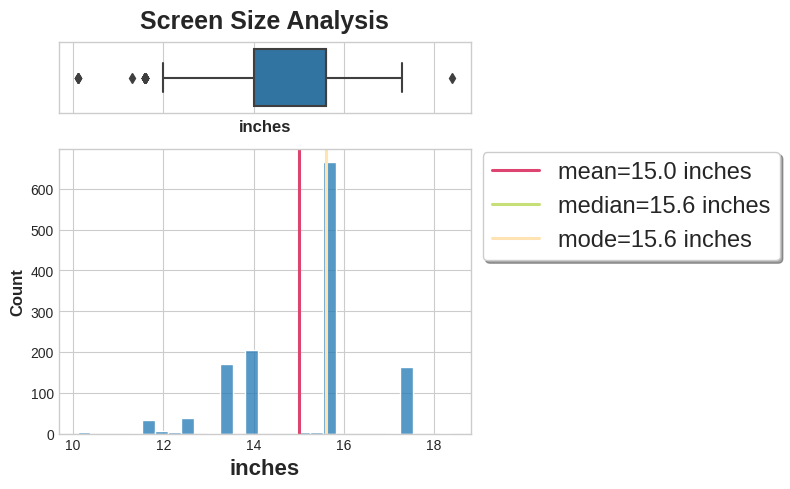

In [ ]:
num_plot(df_cleaned, 'inches', 'Screen Size Analysis', ' inches')

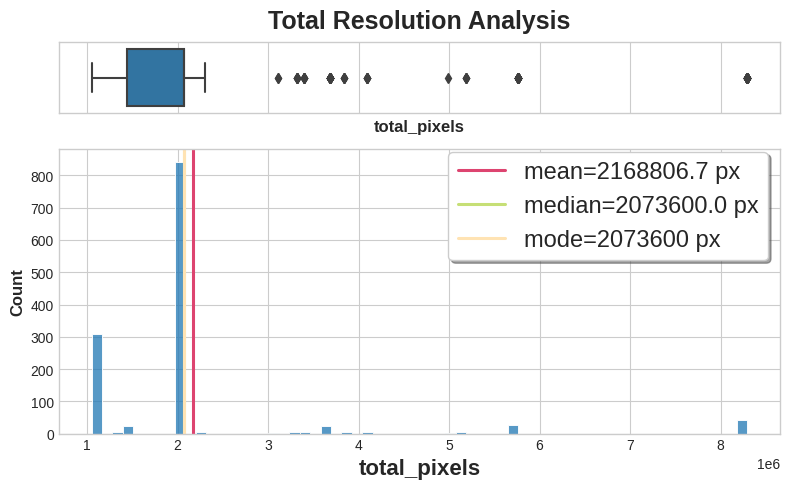

In [ ]:
# Combine into total pixels
df_cleaned['total_pixels'] = df_cleaned['resolution_width'] * df_cleaned['resolution_height']

# Combined Visualization
num_plot(df_cleaned, 'total_pixels', 'Total Resolution Analysis', ' px')

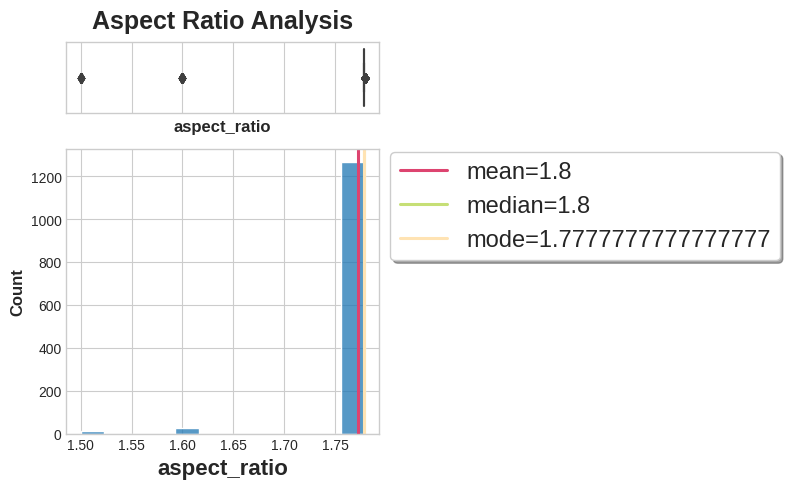

In [ ]:
num_plot(df_cleaned, 'aspect_ratio', 'Aspect Ratio Analysis', '')

## Which brand is the most frequent in the dataframe?

In [ ]:
# Most frequent brand in cleaned DataFrame
brand_counts = df_cleaned['company'].value_counts()
brand_counts

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: company, dtype: int64

So, the most frequent brands are Dell and Lenovo

## What type of laptop is the most frequent?

In [ ]:
# Most frequent type of laptop in cleaned DataFrame
most_frequent_type = df_cleaned['typename'].value_counts().idxmax()
print(f"The most frequent type of laptop is: {most_frequent_type}")

The most frequent type of laptop is: Notebook


## Which size is the most popular?

In [ ]:
# Most popular size in cleaned DataFrame
most_popular_size = df_cleaned['inches'].value_counts().idxmax()
print(f"The most popular size is: {most_popular_size} inches")

The most popular size is: 15.6 inches


## How is weight distributed among the laptops?

In [ ]:
def plot_weight_distribution(df_cleaned):
    plt.figure(figsize=(10, 6))
    sns.histplot(df_cleaned['weight_kg'], bins=50, kde=True, color='pink')
    plt.title('Distribution of Laptop Weights')
    plt.xlabel('Weight (kg)')
    plt.ylabel('Frequency')
    plt.show()

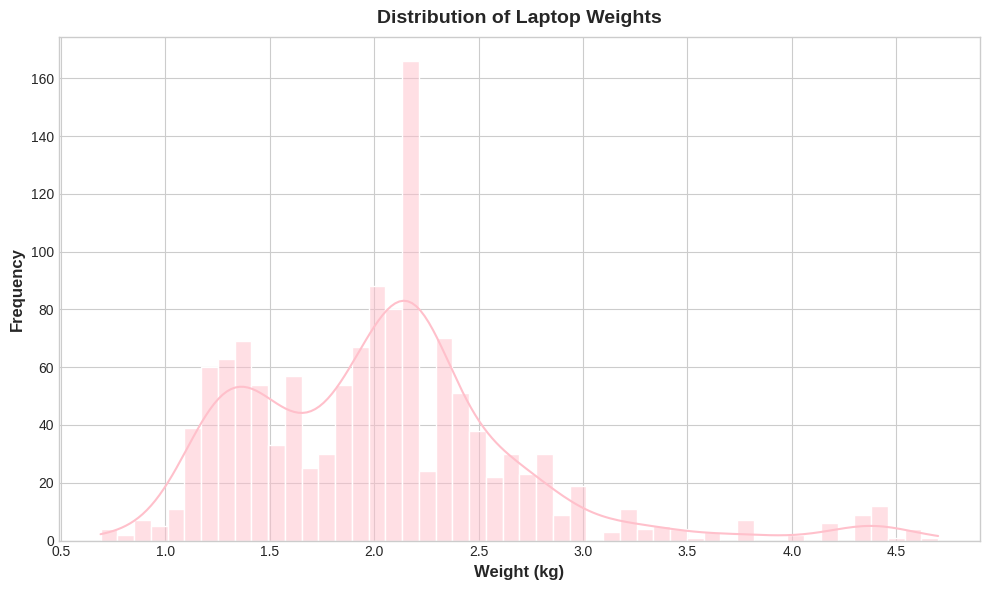

In [ ]:
plot_weight_distribution(df_cleaned)

## How is price distributed among the laptops?

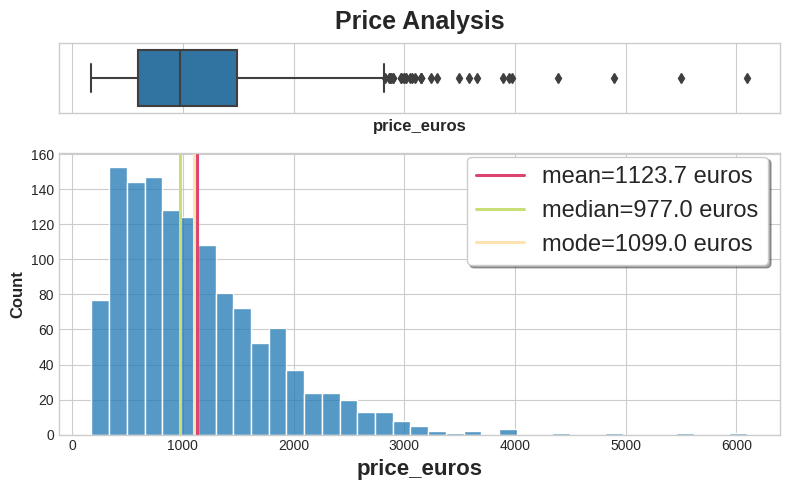

In [ ]:
num_plot(df_cleaned, 'price_euros', 'Price Analysis', ' euros')

## How is RAM distributed among the laptops?

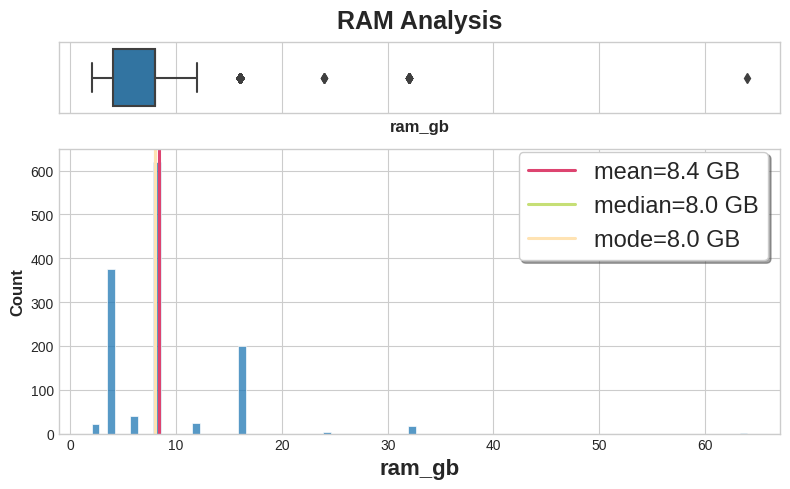

In [ ]:
num_plot(df_cleaned, 'ram_gb', 'RAM Analysis', ' GB')

## How is CPU frequency distributed among the laptops?

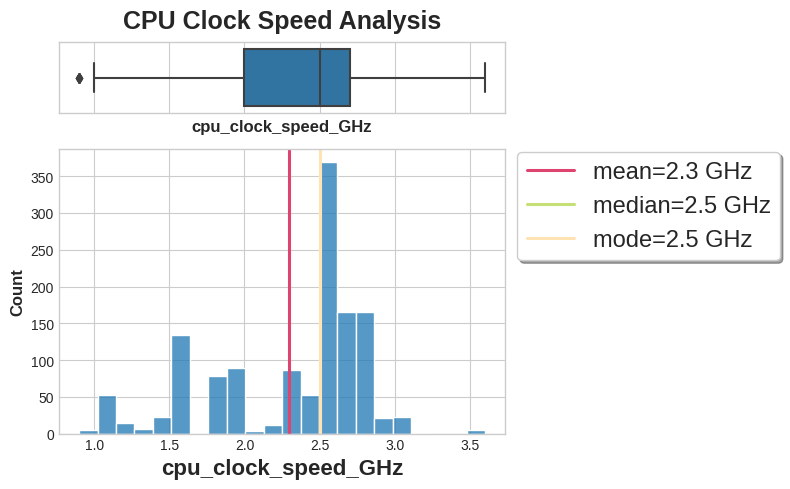

In [ ]:
num_plot(df_cleaned, 'cpu_clock_speed_GHz', 'CPU Clock Speed Analysis', ' GHz')

## How is Hard Drive capacity distributed among the laptops?

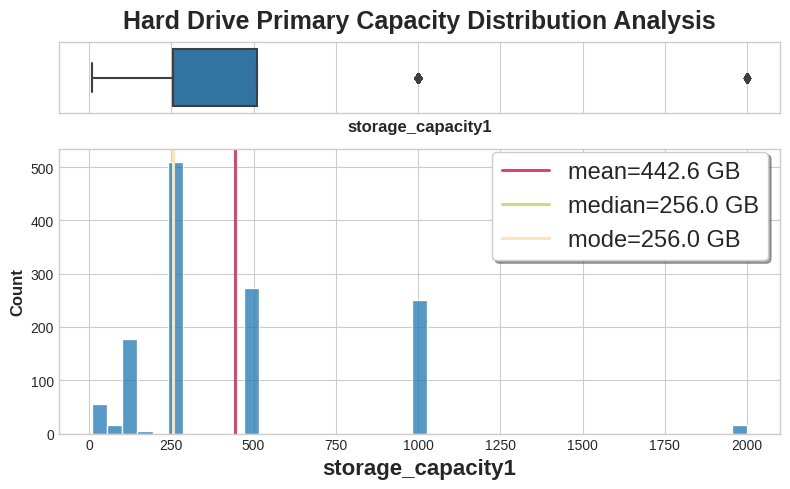

In [ ]:
num_plot(df_cleaned, 'storage_capacity1', 'Hard Drive Primary Capacity Distribution Analysis', ' GB')

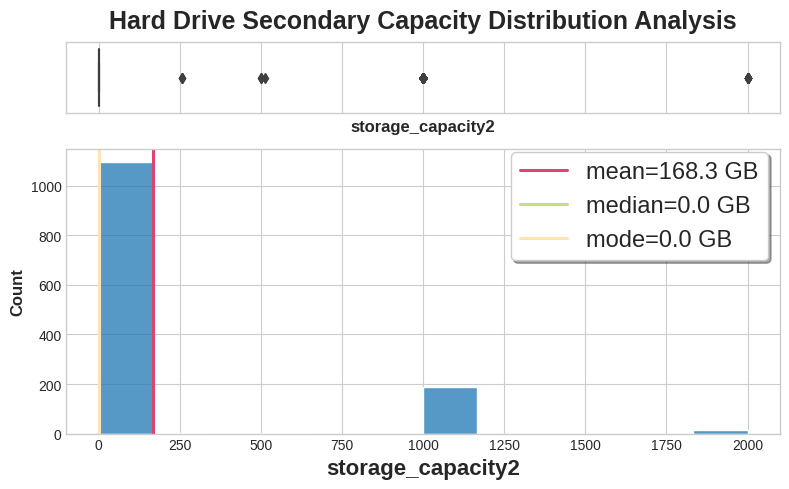

In [ ]:
num_plot(df_cleaned, 'storage_capacity2', 'Hard Drive Secondary Capacity Distribution Analysis', ' GB')

## Price VS CPU brand by GPU brand

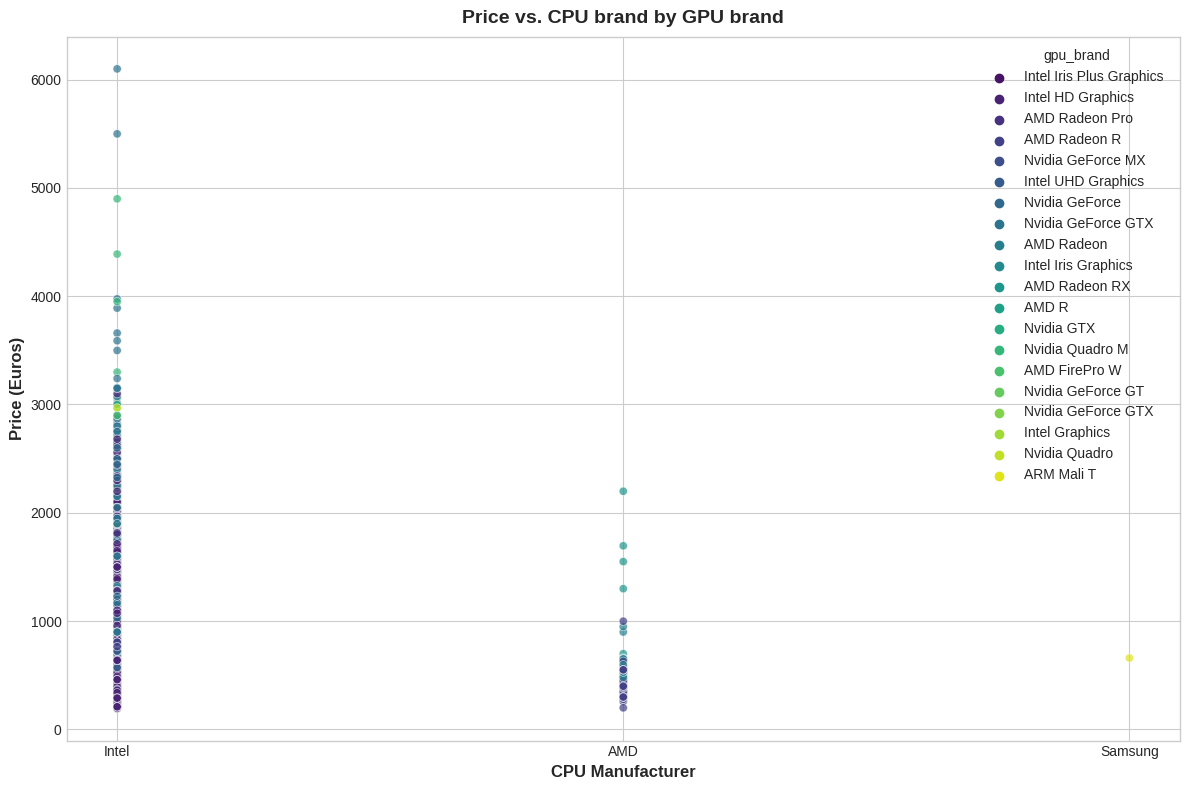

In [ ]:
# Scatter plot: Price vs. CPU brand, colored by GPU brand
plt.figure(figsize=(12, 8))
sns.scatterplot(x='cpu_manufacturer', y='price_euros', hue='gpu_brand', data=df_cleaned, palette='viridis', alpha=0.7)
plt.title('Price vs. CPU brand by GPU brand')
plt.xlabel('CPU Manufacturer')
plt.ylabel('Price (Euros)')
plt.show()


Insights from this plot:

* Laptops with Intel processors are more prevalent in the dataset
* AMD CPUs are also well-represented but perhaps not as dominant as Intel
* Samsung may not be as prevalent in the laptop market compared to Intel and AMD

## Which are the TOP 15 most common GPUs?

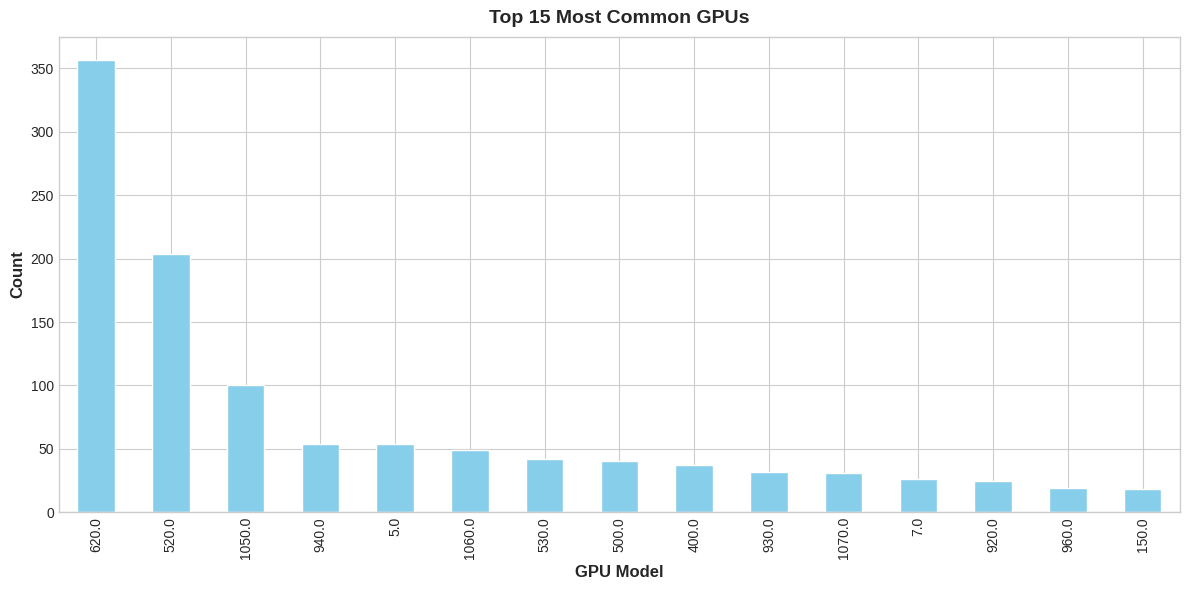

In [ ]:
top_gpus = df_cleaned['gpu_model'].value_counts().head(15)

plt.figure(figsize=(12, 6))
top_gpus.plot(kind='bar', color='skyblue')
plt.title('Top 15 Most Common GPUs')
plt.xlabel('GPU Model')
plt.ylabel('Count')
plt.show()

## Which are the TOP 15 most common CPUs?

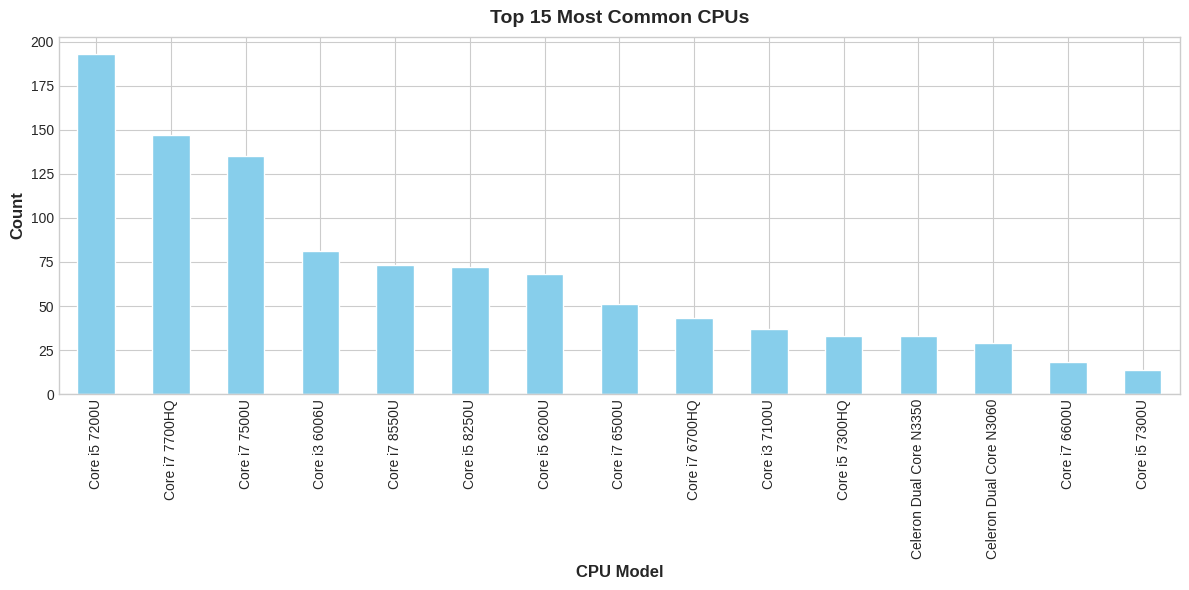

In [ ]:
top_cpus = df_cleaned['cpu_model'].value_counts().head(15)

plt.figure(figsize=(12, 6))
top_cpus.plot(kind='bar', color='skyblue')
plt.title('Top 15 Most Common CPUs')
plt.xlabel('CPU Model')
plt.ylabel('Count')
plt.show()

## What is the average price of laptops by company?

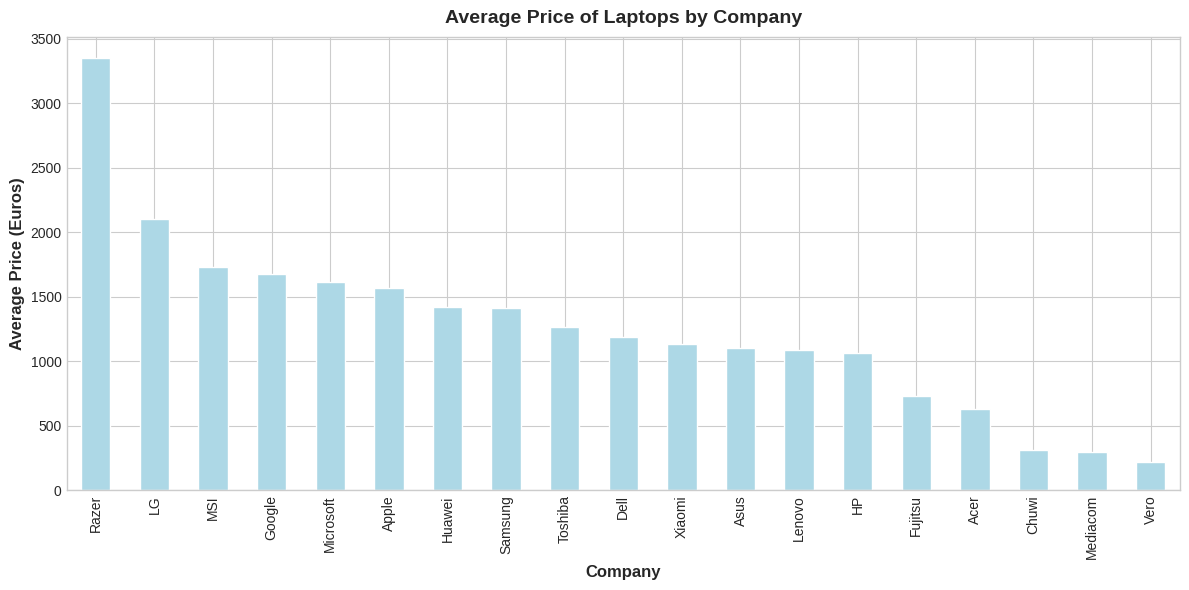

In [ ]:
# Group the data by the 'company' column and then calculate the mean price for each group
average_price_by_company = df_cleaned.groupby('company')['price_euros'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
average_price_by_company.plot(kind='bar', color='lightblue')
plt.title('Average Price of Laptops by Company')
plt.xlabel('Company')
plt.ylabel('Average Price (Euros)')
plt.show()

Insights:
* Razer has the highest average price
* Dell, Lenovo, and Asus are mid-range
* Brands with higher average prices may be perceived as premium, while those with lower average prices may be targetting budget-conscious customers

In [ ]:
# Save the most updated DataFrame to a CSV file
df_cleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/[Final]Laptop_Price_Analysis.csv', index=False)